회귀 심화_사전학습
=====
*****
## 1. 선형회귀 (OLS 이용)
-----
### 1) 회귀 분석 프로세스
1. 사전 검증
   * 데이터 탐색, 전처리(결측치, 이상치)
   * **회귀 분석의 기본 가정 6가지 검토**
2. 모델 생성 및 모델 fit
   * 회귀 모델 생성, 모델 설정, 모델 학습
   * 모델 유의성 검정 (F-test, T-test)
3. 모델 성능 평가
   * R-squared
   * 회귀 분석 후 검증 가능한 가설 검토
4. 모델 성능 개선
   * 불필요 변수 제거
   * 비선형 모델 활용

### 2) 다중선형회귀 수식
* $y_i=\beta_0+\beta_1X_1i+\beta_2X_2i+\dots+\beta_kX_ki+\epsilon_i$
* 상수항, 오차항 제외 식      
  $y=w_0x_0+w_1x_0+\dots+w_mx_m\\=\sum_{i=0}^{m}{w_ix_i}=w^Tx$

> * $y_i$: i번째 종속 변수 (관심 있는 값)
> * $X_ki$:i번째 y에 대한 여러 개의 독립 변수
> * $\beta_k$: 각 독립변수에 대한 회귀 계수. (각 변수 X의 영향력, 즉 가중치)
> * $\epsilon_i$:오차항

### 3) 다중선형회귀의 기본 가정
: 선형회귀를 사용하기 위하여 만족해야 하는 가정.    
  선형성, 독립성, 오차항의 자기상관성 여부(간접)는 회귀 분석 전 검증이 가능하다.   
  (나머지는 회귀 분석 후에 검증이 가능.)

#### 가정1. 선형성 (linearity)
* $E(y|X)=\beta_1+\dots+\beta_nX_n$
* 독립변수와 종속변수가 선형적이어야 함. (선형방정식의 형태)

#### 가정2. 독립성 (Independent)
* $X_i,X_j\;is\;linearly\;independent\;for\;all\;i,j$
* 각각의 독립변수가 선형 독립이어야 함.
* 아닌 경우 다중공선선이 있다고 판단 (상관 계수, VIF로 알아보기 -> 변수제거나 규제 선형모델, PCA 방법으로 대처)

#### 가정3. 오차항의 평균은 0 (혹은 0에 가까워야 한다)
* $E(\epsilon_i|X_i)=0$
* 오차항($\epsilon$,백색 잡음):실제 값과 예측 값의 차이
* 백색 잡음(랜덤신호)의 성질을 만족하기 위하여 평균적으로 어느 방향에 치우치지 않아야 한다.

#### 가정4. 등분산성 (Homoscedasticity)
* $Var(\epsilon_i|X_i)=\sigma^2$
* 오차항($\epsilon$)의 분산($\sigma^2$)이 일정해야 한다는 가정.
* 아닌 경우 이분산성(heteroscedasticity)이 있다고 말한다.
* 이분산성인 경우, 모델의 예측이 일부 구간에서는 오차가 매우 커질 수 있음
* 따라서 등분산성의 가정을 만족하는지 알아야함
  + 등분산성을 알아보는 법: 잔차의 도표화, 검정

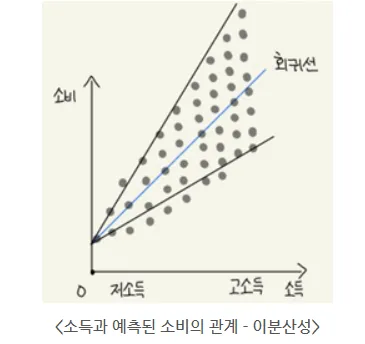 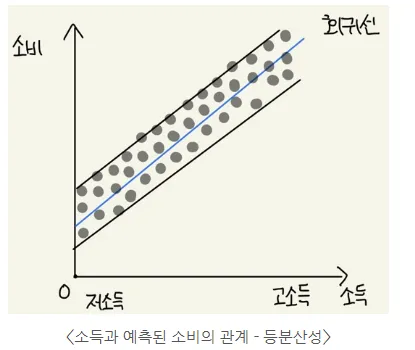

#### 가정5. 오차항은 자기상관 되어있지 않다. (non-autocorrelation)
* $Cov(\epsilon_i,\epsilon_j|X_i)=0$
* 오차항의 공분산(Cov, 두 변수간의 상관 정보)은 항상 0이 된다는 가정.
  + Cov가 양수면 양의 상관관계, 음수면 음의 상관관계, 0이어야 독립적인 관계임
  + Cov가 0이 아닌 모든 경우를 자기상관(autocorrelation)이 있다고 함.
* 자기상관: 한 변수의 현재 값이 과거 값과 상관관계를 가지는 현상 (특히 시계열 자료에서 발생, 이전 패턴의 데이터를 학습해 반복 오류 만들 가능성 있음)

#### 가정6. 정규성 (nomality)
* $\epsilon_i\,\sim\,N(0,\sigma^2)$
* 오차항이 정규분포를 따른다는 가정.(회귀 계수들을 검정할 때 오차항이 정규분포를 따른다고 가정하고 검정하기 때문.)
* 그러나 위배되어도 다중선형회귀분석의 결과에 큰 영향은 X

### 4) 회귀분석 평가 방법
: 회귀선을 데이터와 함께 시각화 or 통계지표 활용하기.    
  시각화한 데이터로 잘 안 보인다면 통계지표를 불러오면 된다.

#### 1. 통계지표

In [ ]:
import statsmodels.api as sm
results=sm.OLS(Y , sm.add_constant(X)).fit()
results.summary()

#### 2. 모델 유의성 검정
1. F-statistic, Prob(F-statistic)
   * F-statistic: **회귀 모델** 이 유의미한지 검정하는 지표 (y와 전체 X)
   * - H0: 모든 회귀 계수가 0이다 (독립-종속 관계X)     
     - H1: 적어도 하나의 회귀 계수는 0이 아니다 (독립변수 중 하나 이상이 종속 변수에 영향을 준다)
   * F-statistic 값 클수록 모델 유의미
   * Prob(F-statistic)은 F-statistic의 p-value. 0.05 미만일 시 귀무가설 기각.

2. T-statistic
   * **각 독립변수**가 종속변수 y에 유의미한지 검정하는 지표
   * - H0: 해당 변수의 회귀계수가 0이다. (이 변수는 종속변수에 영향X)
     - H1: 해당 변수의 회귀계수는 0이 아니다. (이 변수는 종속변수에 영향 줌)
   * p-value(P>|t|) 0.05 값을 기준으로 가설 검정 수행.

#### 3. 모델 성능 평가
1. 결정계수 (R-squared, R^2)
   * 회귀 분석에서 모델이 설명하는 데이터의 **총 변동(평균과의 차이) 중 설명된 비율** 을 뜻함.    
   -> 즉 데이터의 평균을 예측 값으로 사용할 때 보다, 모델을 사용할 때 얼마나 더 정확히 예측하는지의 지표.
   * $R^2=\frac{SSR}{SST}\\=1-\frac{SSE}{SST}$
     - SSR: 잔차제곱합, SST: 총 변동,  SSE: 모델이 설명 못한 오차
     - 즉, 전체 데이터 변동(SST) 중에서 모델이 몇 %를 설명하고 있는가?
     - 1에 가까울수록 SSR과 SST값이 비슷해지고, SSE(모델이 설명못한 오차)는 0에 가까워지므로 데이터를 잘 설명하는 것이다.

2. 조정된 결정계수 (Adjust R-squared, Adjust R^2)
   * R^2는 독립변수의 개수가 증가하면 자연스레 증가하므로, 독립변수의 개수에 따른 보정 효과를 주는 조정한 지표.
   * $R^2=\frac{SSR(n-1)}{SST(n-k)}\\\;=1-(\frac{SSE/(n-k)}{SST/(n-1)})$
     - n: 샘플 수, k: 독립 변수의 개수
     - k 증가시 전체 값 감소 (변수 개수에 따른 설명력 상승을 상쇄)
     - 변수 추가했는데 (k+), SSE(모델 설명X 오차)가 충분히 감소하면 $SSE/(n-k)$가 작아져서 adjust R^2 값 증가
     - 변수 추가했는데 SSE가 그대로면 SSE는 동일하고 n-k만 작아지니까 adjust R^2 값 감소


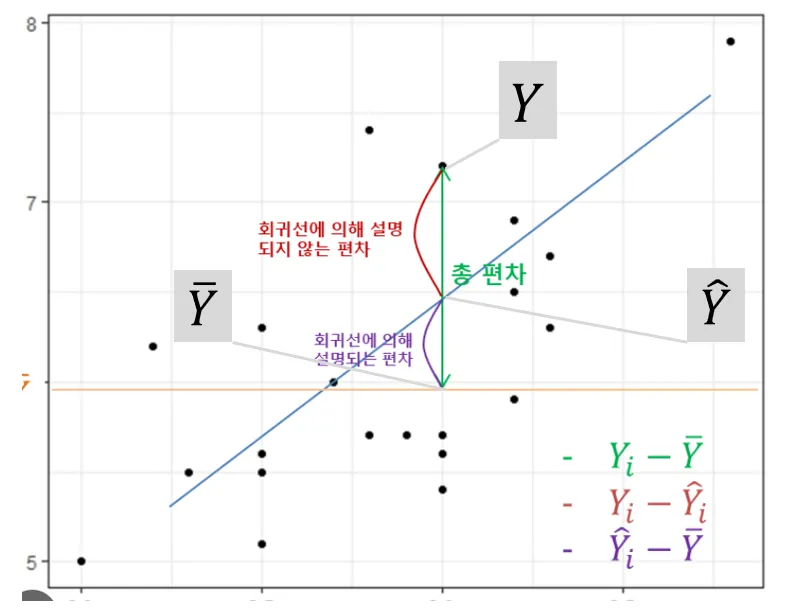

> * 노란선: 평균, 초록선: SST, 보라선: SSR, 빨간 선: SSE
> * $\bar{Y}$:평균, $\hat{Y}$:예측 값, $Y$:실제 값


3. AIC, BIC(SC)
: 정보기준(information criteria)이라고도 불리며 ,값이 낮을수록 좋다.

## 2. 비선형 회귀
-----
: 데이터 셋의 분포가 선형이 아닌 경우의 회귀 방법들.

### 1) 다항식 회귀모델 (Polynominal regression model)
* $Y=a+bX+cX^2+dX^3+\dots$
* 독립변수에 거듭제곱항을 추가하여 데이터의 곡선적 특성 모델링
* 사용 방법
  - 기존의 선형 모델에 다음 항들을 포함하여 모델 확장
  - 확장한 상태에서 선형 회귀 적용
* 성장률, 감소율 등 시간에 따라 변화 속도가 다른 경우 사용

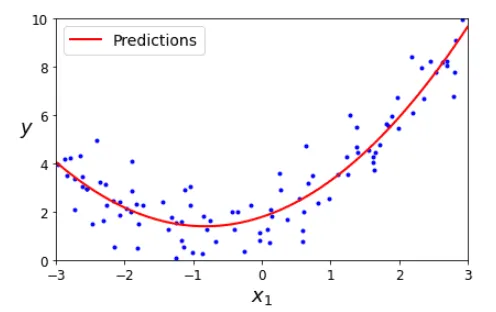

In [ ]:
# 기존 변수들을 다항식으로 만들기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)  
X_poly = poly.fit_transform(X)

# 선형회귀 클래스 똑같이 이용
    # statsmodel의 sm 이용: 통계적 해석 제공. 회귀계수 유의성 분석 시 사용하자
import statsmodels.api as sm

X_poly = sm.add_constant(X_poly)
model = sm.OLS(Y, X_poly).fit()
Y_pred = model.predict(X_poly)

    # sklearn의 LinearRegression 이용: 정규화(Ridge,Lasso) 가능. 정규화와 다항 회귀 적용에서 사용하자.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

### 2) 지수 회귀모델 (Exponential model)
* 종속변수가 지수적으로 변화하는 관계 모델링
* $Y=ae^(bX)$
* 양변에 로그 취하면 $\ln{Y}=\ln{a}+bX$     
  여기서 $\ln(Y)$를 $Y'$으로, $\ln{a}$를 $a'$으로 보면 선형회귀식과 비슷함을 알 수 있다.        
  -> 종속변수 Y에만 로그함수 적용     
  -> 로그 변환된 Y와 기존의 독립변수 X에 대해 선형 회귀 적용       
  -> 모델이 ln Y 와 X의 선형 관계 학습.     
  -> Y 값 예측시, Y에 지수함수($e^x$)를 적용하면 됨.
* 기술 발전, 투자 수익률 등 값이 시간에 따라 지수적 증/감시 이용.

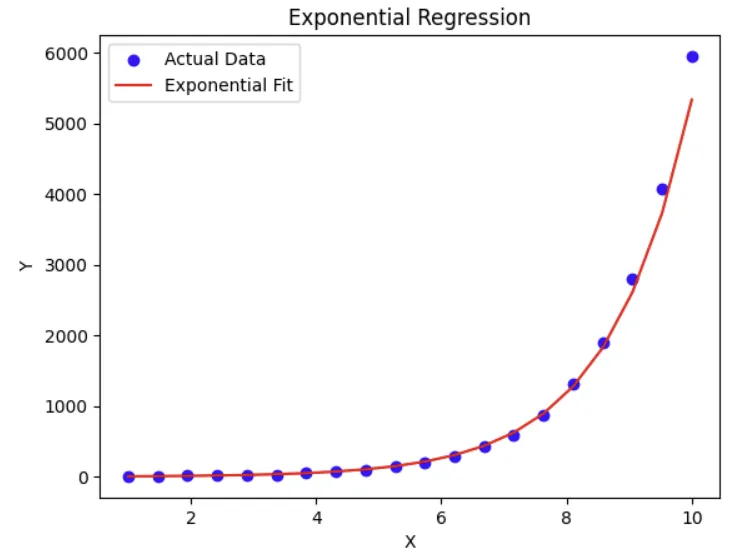

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 지수함수 형태의 임의의 데이터 생성 
np.random.seed(42)
X = np.linspace(1, 10, 20).reshape(-1, 1)
Y = 2 * np.exp(0.8 * X).flatten() + np.random.normal(0, 10, X.shape[0]) 

# 종속변수 Y에 자연 로그 변환
log_Y = np.log(Y) # log_Y: 로그 변환된 Y

# 회귀 모델 학습 (log(Y) = a + bX)
X_const = sm.add_constant(X)  
model = sm.OLS(log_Y, X_const).fit()

# 예측값 변환 (exp를 적용해 원래 스케일로 변환)
log_Y_pred = model.predict(X_const)
Y_pred = np.exp(log_Y_pred) # exp(지수 함수) 적용해서 로그 변환 되기 전의 Y로

### 3) 로그 회귀모델 (log regression model)
* 종속변수와 독립변수 간 관계가 로그 함수를 통해 더 잘 표현될 때
* $ Y=a+b\log{X}$
* $Y=a+bX$ 선형식에서 X 자리에 log(X) 들어간 꼴.      
  -> X에 로그 적용 후 나머지 과정은 선형 회귀와 같음.    
  -> Y는 그대로이므로 예측값에 별도의 처리 필요 없음.
* 데이터가 초기에 빠르게 증가, 점차 증가율이 줄어드는 패턴 (인구 성장, 감염병 확산 등) 보이기 좋다.

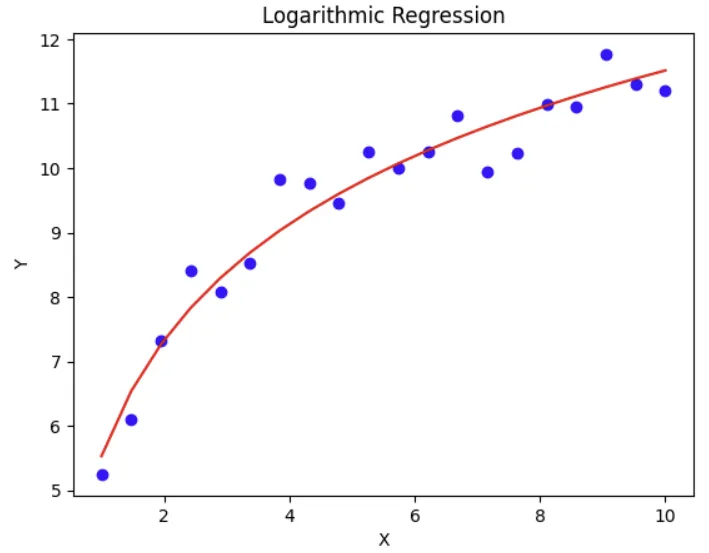

In [ ]:
# 로그함수 형태의 임의의 데이터 생성 
np.random.seed(42)
X = np.linspace(1, 10, 20).reshape(-1, 1)
Y = 5 + 3 * np.log(X).flatten() + np.random.normal(0, 0.5, X.shape[0]) 

# 독립 변수 X에 자연 로그 변환
log_X = np.log(X)

# 회귀 모델 학습 (Y = a + b * log(X))
log_X_const = sm.add_constant(log_X) 
model = sm.OLS(Y, log_X_const).fit()

# 예측값 계산
Y_pred = model.predict(log_X_const)


### 4) 스플라인 회귀 (Spline Regression)
* 데이터를 구간별로 나누고, 각 구간에서 선형 또는 비선형 함수를 적용하여 예측하는 방법.
* 구간 경계에서 연속성 유지하는게 중요
* $Y=\begin{cases} a_1+b_1X, \; if\; X<c_1 \\ a_2+b_2X, \; if\; c_1\leq X\leq C_2\\ a_n+b_nX,  \;if\; X\geq C_(n-1)\end{cases}$
* 데이터 패턴이 여러 구간에서 서로 다르게 나타날 때 (계절에 따른 판맬량 변동 등)

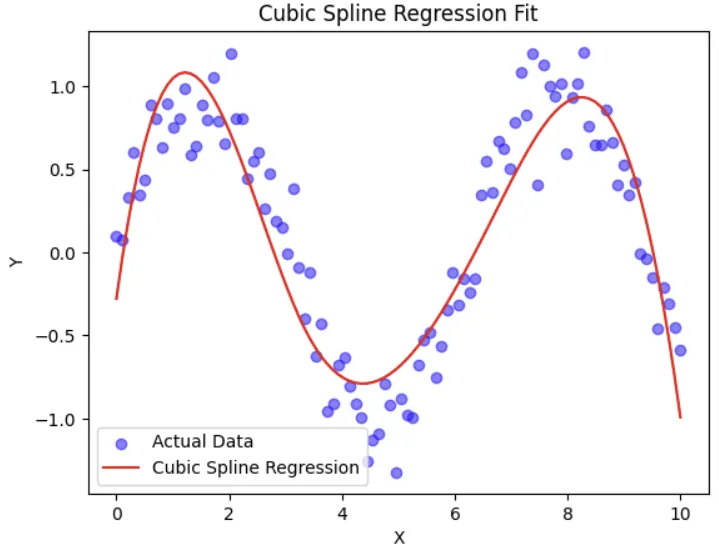

In [ ]:

from patsy import dmatrix
# 랜덤 데이터 생성
np.random.seed(42)
X = np.linspace(0, 10, 100)
Y = np.sin(X) + np.random.normal(0, 0.2, size=X.shape)

# X의 데이터에 스플라인 함수를 적용하여 새로운 데이터 X_spline을 만들고, 
# 이 새로운 데이터로 선형 회귀를 진행하는 방식

X_spline = dmatrix("bs(X, df=5, degree=3, include_intercept=False)", 
{"X": X}, return_type='dataframe')
# X: 데이터
# df: 나눌 구간의 수+1 (df=5라면 4개의구간으로 구분합니다)
# degree: 사용할 회귀 모델의 차수 (degree=1이면 선형회귀, degree=2면 2차 다항 회귀)
# include_intercept=False: 절편 제거(필요하면 True로)
# return_type='dataframe': dataframe 형식으로 반환합니다.

model_spline = sm.OLS(Y, X_spline).fit()
Y_pred_spline = model_spline.predict(X_spline)
